In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Загрузка датасета

In [4]:
import numpy as np
import pandas as pd

In [5]:
BASE_URL = '/content/drive/MyDrive/titanic/'

In [6]:
df = pd.read_csv(f'{BASE_URL}Titanic.csv')

Создание копии DataFrame

In [7]:
df_initial = df.copy(deep=True)

In [8]:
df_initial

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Обработка DataFrame

In [10]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [11]:
df.shape

(891, 12)

In [12]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}

In [15]:
categorical_cols

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [18]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,147,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,147,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.0,0,0,101,13.0000,147,2
887,888,1,1,303,0,19.0,0,0,14,30.0000,30,2
888,889,0,3,413,0,NaN,1,2,675,23.4500,147,2
889,890,1,1,81,1,26.0,0,0,8,30.0000,60,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int64  
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int64  
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 83.7 KB


In [20]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int64  
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int64  
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 83.7 KB


In [22]:
df['Age'].fillna(df['Age'].median(),inplace=True)

<ipython-input-22-e0c0624688bb>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)


In [23]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int64  
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int64  
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 83.7 KB


# Аналитика

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Распределение выживших и погибших

In [26]:
# Получаем количество выживших и погибших
total_survived = df['Survived'].value_counts()
total_survived

,count
Survived,
0,549
1,342


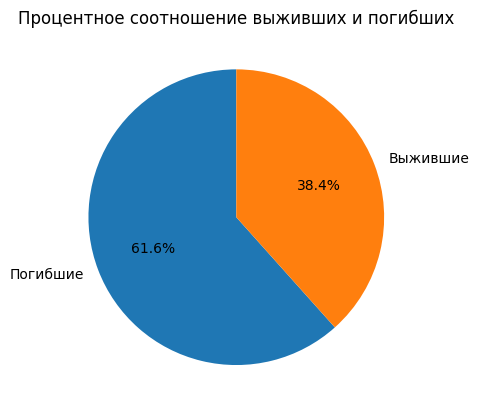

In [27]:
# Строим круговую диаграмму
total_survived.plot(
    kind='pie', # Круговая диаграмма
    startangle=90, # Поворот диаграммы для простоты восприятия
    autopct='%1.1f%%', # Отображение в процентах с одним знаком после точки
    labels=['Погибшие', 'Выжившие']
)
plt.title('Процентное соотношение выживших и погибших')
plt.ylabel('')
plt.show()

Видно, что выживших почти в 2 раза меньше чем погибших

### Распределение мужчин и женщин на корабле



In [28]:
# Получаем количество мужчин и женщин на борту
male_female = df_initial['Sex'].value_counts()
male_female

,count
Sex,
male,577
female,314


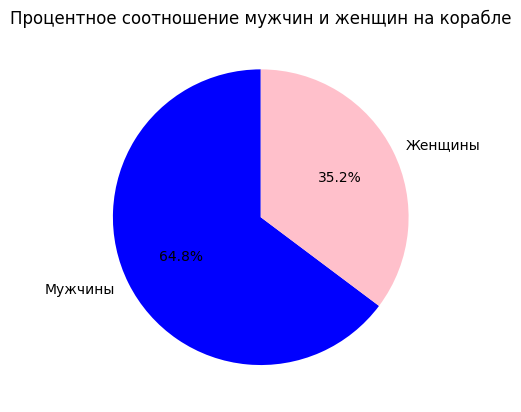

In [29]:
male_female.plot(
    kind='pie',
    colors=['blue', 'pink'],
    startangle=90,
    autopct='%1.1f%%',
    labels=['Мужчины', 'Женщины']
)
plt.title('Процентное соотношение мужчин и женщин на корабле')
plt.ylabel('')
plt.show()

Из диаграммы видно, что на корабле мужчин было почти в 2 раза больше, чем женщин

### Количество выживших и умерших в зависимости от пола и класса

In [30]:
# Группируем данные по полу и классу и считаем количество выживших и погибших
surv = df_initial.groupby(['Sex', 'Pclass'])['Survived'].value_counts()
surv_un = surv.unstack() # Преобразуем полученные данные в более удобный вид
surv_un

Survived         0   1
Sex    Pclass         
female 1         3  91
       2         6  70
       3        72  72
male   1        77  45
       2        91  17
       3       300  47

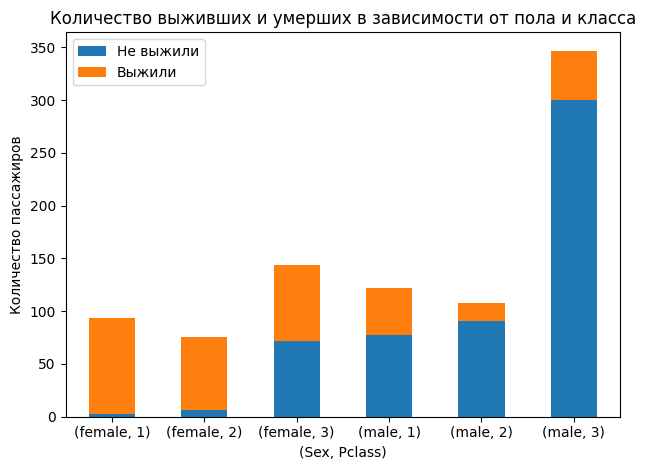

In [31]:
surv_un.plot(
    kind='bar', # столбчатая диаграмма
    stacked=True # составные столбцы
)
plt.title('Количество выживших и умерших в зависимости от пола и класса')
plt.xlabel('(Sex, Pclass)')
plt.ylabel('Количество пассажиров')
plt.legend(['Не выжили', 'Выжили'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Видно, что в процентном соотношении выжило больше женщин чем мужчин. К тому же чаще выживали женщины, которые путешествовали первым и вторым классами

### Зависимость выживаемости пассажира в зависимости от того путешествовал он один или нет

In [32]:
# Создаю новый признак, человек путешествует один или нет
df['IsAlone'] = np.where((df['SibSp'] == 0) & (df['Parch'] == 0), 1, 0)

In [33]:
# Группирую данные по атрибутам IsAlone и Survived
is_alone_survived = df.groupby(['IsAlone', 'Survived']).size().unstack()
is_alone_survived

Survived,0,1
IsAlone,,
0,175,179
1,374,163


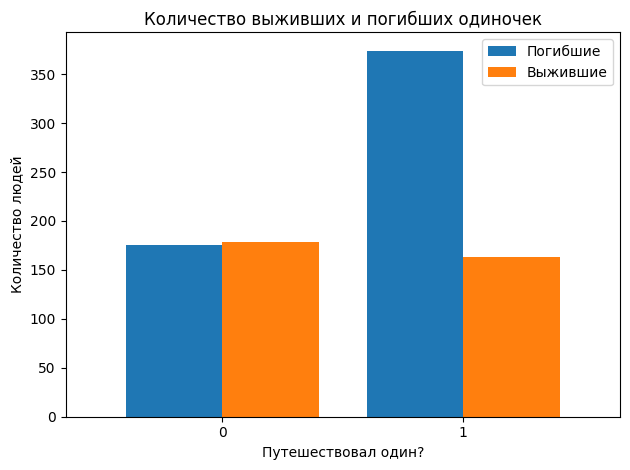

In [34]:
is_alone_survived.plot(
    kind='bar',
    stacked=False,
    width=0.8
)
plt.title('Количество выживших и погибших одиночек')
plt.xlabel('Путешествовал один?')
plt.ylabel('Количество людей')
plt.xticks(rotation=0)
plt.legend(['Погибшие', 'Выжившие'])
plt.tight_layout()
plt.show()

На диаграмме видно, что если человек путешествовал один, то на шансы на его выживание уменьшались более чем в 2 раза. Если пассажир путешествовал не один, то шанс на гибель и выживание были примерно одинаковы

### Количество выживших в процентах в зависимости от количества родственников на борту

In [35]:
df_relatives = pd.DataFrame()
# Складываю значения столбцов и создаю новый столбец
df_relatives['Relatives'] = df['SibSp'] + df['Parch']
df_relatives['Survived'] = df['Survived']

In [36]:
df_relatives

,Relatives,Survived
0,1,0
1,1,1
2,0,1
3,1,1
4,0,0
...,...,...
886,0,0
887,0,1
888,3,0
889,0,1


In [37]:
# Группирую по количеству родственников на борту у пассажира и
# считаю сколько пассажиров выжило, а сколько погибло
df_relatives = df_relatives.groupby('Relatives')['Survived'].value_counts().unstack()

In [38]:
df_relatives

Survived,0,1
Relatives,,
0,374.0,163.0
1,72.0,89.0
2,43.0,59.0
3,8.0,21.0
4,12.0,3.0
5,19.0,3.0
6,8.0,4.0
7,6.0,NaN
10,7.0,NaN


In [39]:
df_relatives.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       9 non-null      float64
 1   1       7 non-null      float64
dtypes: float64(2)
memory usage: 216.0 bytes


In [40]:
# Избавляюсь от NaN и ставлю 0, тк не было сведений о выживших
df_relatives.fillna({1: 0}, inplace=True)

In [41]:
df_relatives

Survived,0,1
Relatives,,
0,374.0,163.0
1,72.0,89.0
2,43.0,59.0
3,8.0,21.0
4,12.0,3.0
5,19.0,3.0
6,8.0,4.0
7,6.0,0.0
10,7.0,0.0


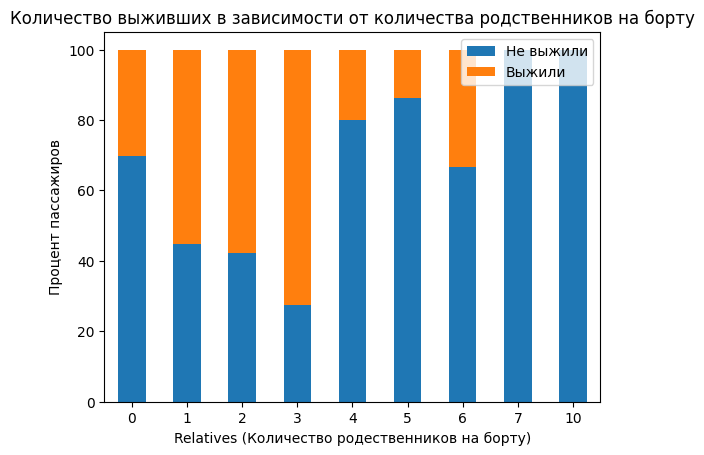

In [42]:
# Считаю процент выживших и погибших
# div поэлементно делит значения в одном объекте на значения в другом
df_relatives_percent = df_relatives.div(df_relatives.sum(axis=1), axis=0) * 100

df_relatives_percent.plot(kind='bar', stacked=True)
plt.title('Количество выживших в зависимости от количества родственников на борту')
plt.xlabel('Relatives (Количество родественников на борту)')
plt.ylabel('Процент пассажиров')
plt.legend(['Не выжили', 'Выжили'])

# Поворот подписей для удобства чтения
plt.xticks(rotation=0)
plt.show()

Больший процент выживаемости у пассажиров, которые путешествовали с семьями, в которых от 2 до 4 человек (родственников на борту от 1 до 3)

### Количество выживших в зависимости от возраста

In [43]:
import numpy as np
np.var(df['Sex'])

0.22821808306282707

In [44]:
# Получаю максимальный возраст пассажира
maximum_age = int(max(df['Age']))
maximum_age

80

In [45]:
# Создаю группы для разделения возрастов
bins = range(0, maximum_age + 1, 10)
# Создаю подписи для столбцов
labels = [f'({i}, {i + 10}]' for i in bins[:-1]]
labels

['(0, 10]',
 '(10, 20]',
 '(20, 30]',
 '(30, 40]',
 '(40, 50]',
 '(50, 60]',
 '(60, 70]',
 '(70, 80]']

In [46]:
# cut - позволяет разбить данные столбца на группы
# right - включает правый край интервала в диапазон
df_initial['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)
age_survived = df_initial.groupby(['AgeGroup', 'Survived']).size().unstack()
age_survived

<ipython-input-46-958f87c1e53e>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survived = df_initial.groupby(['AgeGroup', 'Survived']).size().unstack()


Survived,0,1
AgeGroup,,
"(0, 10]",26,38
"(10, 20]",71,44
"(20, 30]",271,136
"(30, 40]",86,69
"(40, 50]",53,33
"(50, 60]",25,17
"(60, 70]",13,4
"(70, 80]",4,1


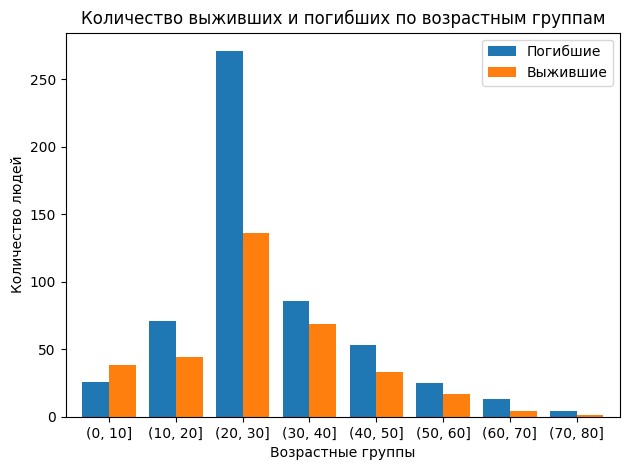

In [47]:
age_survived.plot(
    kind='bar',
    stacked=False,
    width=0.8 # Ширина столбца
)
plt.title('Количество выживших и погибших по возрастным группам')
plt.xlabel('Возрастные группы')
plt.ylabel('Количество людей')
plt.xticks(rotation=0)
plt.legend(['Погибшие', 'Выжившие'])
plt.tight_layout() # Корректирует отступы между элементами на графике
plt.show()

На диаграмме видно, что большая часть пассажиров - это люди от 20 до 30 лет. Также видно, что в процентном соотношении больше всего погибло людей в возрасте от 20 до 30 лет, а выжило в возрасте от 0 до 10 лет.

### Зависимость выживания от порта посадки

In [48]:
embarked_survived = df_initial.groupby(['Embarked', 'Survived']).size()
embarked_survived

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
dtype: int64

In [49]:
# Пустые значения заполняю самым частовстречающимся портом
embarked_survived = embarked_survived.unstack(fill_value='S')

In [50]:
embarked_survived

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


In [51]:
# Создаю атрибут Total и заполняю его значения суммой значений выживших и погибших,
# севших в определённом порту
embarked_survived['Total'] = embarked_survived.sum(axis=1)
# Сортирую по убыванию
embarked_survived = embarked_survived.sort_values(by='Total', ascending=False)
# Удаляю столбец Total
embarked_survived = embarked_survived.drop(columns='Total')
# Меняю символьное обозначение порта на полное название
embarked_survived = embarked_survived.rename(index={'S': 'Southampton', 'C': 'Cherbourg', 'Q': 'Queenstown'})
embarked_survived

Survived,0,1
Embarked,,
Southampton,427,217
Cherbourg,75,93
Queenstown,47,30


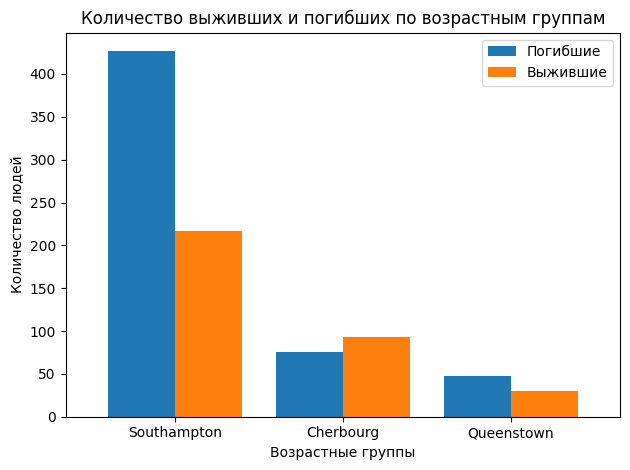

In [52]:
embarked_survived.plot(
    kind='bar',
    stacked=False,
    width=0.8
)
plt.title('Количество выживших и погибших по возрастным группам')
plt.xlabel('Возрастные группы')
plt.ylabel('Количество людей')
plt.xticks(rotation=0)
plt.legend(['Погибшие', 'Выжившие'])
plt.tight_layout()
plt.show()

На диаграмме видно, что большая часть пассажиров села в порту Soutampton. Люди, севшие в порту Cherbourg, имели больше шансов на выживание

# Разбиение данных на тренировочный и тестовый наборы

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int64  
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int64  
 11  Embarked     891 non-null    int64  
 12  IsAlone      891 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 90.6 KB


In [54]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsAlone
0,1,0,3,108,1,22.0,1,0,523,7.2500,147,2,0
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,147,2,1
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2,0
4,5,0,3,15,1,35.0,0,0,472,8.0500,147,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.0,0,0,101,13.0000,147,2,1
887,888,1,1,303,0,19.0,0,0,14,30.0000,30,2,1
888,889,0,3,413,0,28.0,1,2,675,23.4500,147,2,0
889,890,1,1,81,1,26.0,0,0,8,30.0000,60,0,1


In [55]:
df['Relatives'] = df['SibSp'] + df['Parch']
df['Relatives']

,Relatives
0,1
1,1
2,0
3,1
4,0
...,...
886,0
887,0
888,3
889,0


In [56]:
X = df.drop(columns=['Survived', 'Name', 'Fare', 'Ticket', 'PassengerId'])
# X = df.drop(columns=['Survived', 'Name', 'Fare', 'Ticket', 'PassengerId', 'SibSp', 'Parch'])
y = df['Survived']

In [57]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  , 28.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  ,  8.  ,
       19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
       29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [58]:
X

,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,IsAlone,Relatives
0,3,1,22.0,1,0,147,2,0,1
1,1,0,38.0,1,0,81,0,0,1
2,3,0,26.0,0,0,147,2,1,0
3,1,0,35.0,1,0,55,2,0,1
4,3,1,35.0,0,0,147,2,1,0
...,...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,147,2,1,0
887,1,0,19.0,0,0,30,2,1,0
888,3,0,28.0,1,2,147,2,0,3
889,1,1,26.0,0,0,60,0,1,0


In [59]:
X.shape

(891, 9)

In [60]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [61]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


Modeling

In [62]:
df.corr()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsAlone,Relatives
PassengerId,1.000000,-0.005007,-0.035144,-0.038559,0.042939,0.034212,-0.057527,-0.001652,-0.056554,0.012658,-0.035077,0.013083,0.057462,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.057343,-0.543351,-0.064910,-0.035322,0.081629,-0.164549,0.257307,-0.254888,-0.163517,-0.203367,0.016639
Pclass,-0.035144,-0.338481,1.000000,0.052831,0.131900,-0.339898,0.083081,0.018443,0.319869,-0.549500,0.684121,0.157112,0.135207,0.065997
Name,-0.038559,-0.057343,0.052831,1.000000,0.020314,0.048252,-0.017230,-0.049105,0.047348,-0.049173,0.061959,-0.004557,0.070722,-0.036309
Sex,0.042939,-0.543351,0.131900,0.020314,1.000000,0.081163,-0.114631,-0.245489,0.059372,-0.182333,0.096681,0.104057,0.303646,-0.200988
Age,0.034212,-0.064910,-0.339898,0.048252,0.081163,1.000000,-0.233296,-0.172482,-0.070382,0.096688,-0.240839,-0.014205,0.171647,-0.245619
SibSp,-0.057527,-0.035322,0.083081,-0.017230,-0.114631,-0.233296,1.000000,0.414838,0.079461,0.159651,0.043593,0.066654,-0.584471,0.890712
Parch,-0.001652,0.081629,0.018443,-0.049105,-0.245489,-0.172482,0.414838,1.000000,0.020003,0.216225,-0.028324,0.038322,-0.583398,0.783111
Ticket,-0.056554,-0.164549,0.319869,0.047348,0.059372,-0.070382,0.079461,0.020003,1.000000,-0.013885,0.243696,-0.006041,0.028314,0.064302
Fare,0.012658,0.257307,-0.549500,-0.049173,-0.182333,0.096688,0.159651,0.216225,-0.013885,1.000000,-0.503355,-0.221226,-0.271832,0.217138


# Обучение

## Модель 1

In [70]:
!pip install scikeras

In [71]:
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasClassifier

In [103]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [107]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [104]:
# Create the neural network model
def create_model1():
  model = Sequential()
  model.add(Dense(6, activation='relu', input_shape=(X_train.shape[1],)))
  model.add(Dense(9, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  # Compile the model
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model

model = create_model1()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [125]:
model_wrapper = KerasClassifier(model=create_model1, epochs=50, batch_size=32, verbose=0)
cv_results1 = cross_val_score(model_wrapper, X_train, y_train, cv=kfold, scoring='accuracy')
print(f'\nCross-validation accuracy for Model 1: {cv_results1.mean():.2f} ± {cv_results1.std():.2f}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo


Cross-validation accuracy for Model 1: 0.81 ± 0.04


In [105]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5602 - loss: 0.6930 - val_accuracy: 0.6503 - val_loss: 0.6699
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6490 - loss: 0.6672 - val_accuracy: 0.6503 - val_loss: 0.6516
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6421 - loss: 0.6625 - val_accuracy: 0.6434 - val_loss: 0.6355
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6649 - loss: 0.6409 - val_accuracy: 0.6434 - val_loss: 0.6187
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6697 - loss: 0.6291 - val_accuracy: 0.6503 - val_loss: 0.6028
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6689 - loss: 0.6166 - val_accuracy: 0.6923 - val_loss: 0.5856
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7374 - loss: 0.5875 - val_accuracy: 0.7483 - val_loss: 0.5690
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7079 - loss: 0.5987 - val_accuracy: 0.7832 - val_loss

In [106]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8352 - loss: 0.4102 
Test Accuracy: 0.82


In [96]:
import joblib
joblib.dump(model, f'{BASE_URL}models/fully-connected-model.pkl')

['/content/drive/MyDrive/titanic/models/fully-connected-model.pkl']

In [97]:
model_loaded = joblib.load(f'{BASE_URL}models/fully-connected-model.pkl')

In [98]:
y_test.head(5)

,Survived
709,1
439,0
840,0
720,1
39,1


In [99]:
model_loaded.predict(X_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


array([[0.18625484],
       [0.15347888],
       [0.11651499],
       [0.94494337],
       [0.73748714]], dtype=float32)

### Результаты обучения

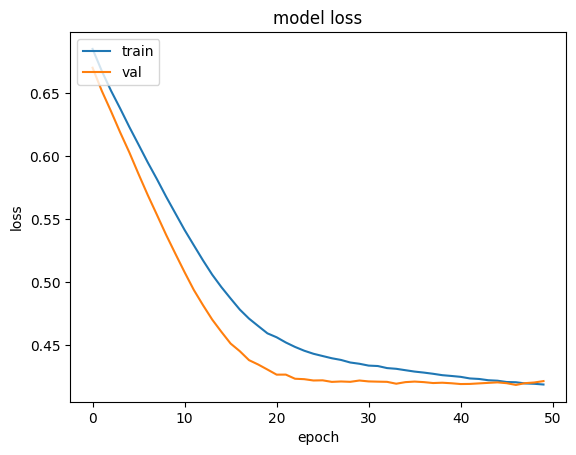

In [116]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

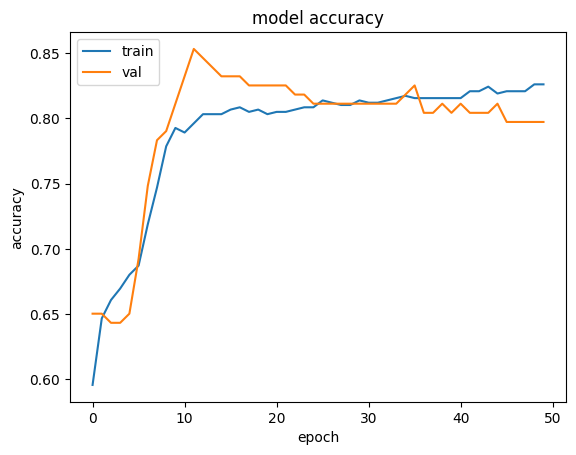

In [117]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [102]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8153 - loss: 0.4077 
Test Accuracy: 0.79


## Модель 2

In [110]:
# Create the neural network model
def create_model2():
  model2 = Sequential()
  model2.add(Dense(6, activation='relu', input_shape=(X_train.shape[1],)))
  model2.add(Dense(9, activation='relu'))
  model2.add(Dense(9, activation='relu'))
  model2.add(Dense(1, activation='sigmoid'))

  # Compile the model
  model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model2

model2 = create_model2()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [132]:
model_wrapper2 = KerasClassifier(model=create_model2, epochs=50, batch_size=32, verbose=0)
cv_results2 = cross_val_score(model_wrapper2, X_train, y_train, cv=kfold, scoring='accuracy')
print(f'\nCross-validation accuracy for Model 2: {cv_results2.mean():.2f} ± {cv_results2.std():.2f}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo


Cross-validation accuracy for Model 2: 0.80 ± 0.02


In [112]:
# Train the model
history2 = model2.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.4652 - loss: 0.6899 - val_accuracy: 0.6503 - val_loss: 0.6794
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6592 - loss: 0.6742 - val_accuracy: 0.7203 - val_loss: 0.6644
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6862 - loss: 0.6706 - val_accuracy: 0.7483 - val_loss: 0.6482
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7277 - loss: 0.6475 - val_accuracy: 0.7552 - val_loss: 0.6276
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7606 - loss: 0.6254 - val_accuracy: 0.7762 - val_loss: 0.6029
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7498 - loss: 0.6157 - val_accuracy: 0.7902 - val_loss: 0.5741
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7556 - loss: 0.5854 - val_accuracy: 0.7902 - val_loss: 0.5426
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7830 - loss: 0.5551 - val_accuracy: 0.8042 - val_loss

In [113]:
loss, accuracy = model2.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8269 - loss: 0.4183 
Test Accuracy: 0.80


In [ ]:
joblib.dump(model2, f'{BASE_URL}models/model2.pkl')

['/content/drive/MyDrive/titanic/models/model2.pkl']

### Результаты обучения

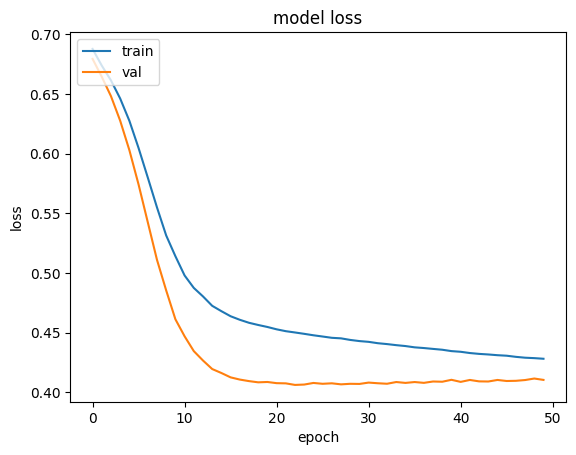

In [114]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

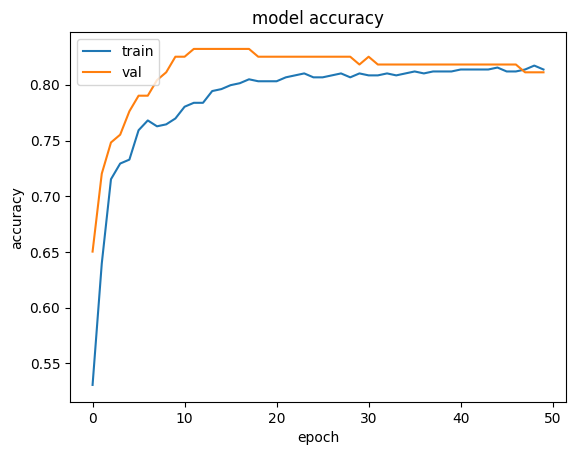

In [115]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# Evaluate the model
loss, accuracy = model2.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8184 - loss: 0.4331 
Test Accuracy: 0.80


## Модель 3

In [118]:
# Create the neural network model
def create_model3():
  model3 = Sequential()
  model3.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
  model3.add(Dropout(0.4))
  model3.add(Dense(64, activation='relu'))
  model3.add(Dropout(0.4))
  model3.add(Dense(32, activation='relu'))
  model3.add(Dropout(0.3))
  model3.add(Dense(16, activation='relu'))
  model3.add(Dense(1, activation='sigmoid'))

  # Compile the model
  model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model3

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [134]:
model_wrapper3 = KerasClassifier(model=create_model3, epochs=100, batch_size=32, verbose=0)
cv_results3 = cross_val_score(model_wrapper3, X_train, y_train, cv=kfold, scoring='accuracy')
print(f'\nCross-validation accuracy for Model 3 (среднее): {cv_results3.mean():.2f} ± {cv_results3.std():.2f}'
      f'\nМаксимальное: {cv_results3.max():.2f}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo


Cross-validation accuracy for Model 3 (среднее): 0.82 ± 0.03
Максимальное: 0.86


In [136]:
fold_no = 1

# Цикл по каждому фолду
for train_index, test_index in kfold.split(X_train):
    # Разделение данных на обучающую и тестовую выборки
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    # Создание и обучение модели
    model3 = create_model3()
    model3.fit(X_train_fold, y_train_fold, epochs=100, batch_size=32, verbose=0)

    # Предсказания на тестовой выборке
    y_pred = (model3.predict(X_test_fold) > 0.5).astype("int32")

    # Вывод confusion_matrix и classification_report
    print(f"Fold {fold_no}")
    print("\nClassification Report:")
    print(classification_report(y_test_fold, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test_fold, y_pred))
    print("\n" + "="*50 + "\n")

    fold_no += 1

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Fold 1

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        87
           1       0.77      0.71      0.74        56

    accuracy                           0.80       143
   macro avg       0.80      0.79      0.79       143
weighted avg       0.80      0.80      0.80       143

Confusion Matrix:
[[75 12]
 [16 40]]




/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Fold 2

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.89      0.84        90
           1       0.76      0.60      0.67        53

    accuracy                           0.78       143
   macro avg       0.78      0.75      0.76       143
weighted avg       0.78      0.78      0.78       143

Confusion Matrix:
[[80 10]
 [21 32]]




/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Fold 3

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.91      0.82        79
           1       0.85      0.62      0.72        63

    accuracy                           0.78       142
   macro avg       0.80      0.77      0.77       142
weighted avg       0.79      0.78      0.78       142

Confusion Matrix:
[[72  7]
 [24 39]]




/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Fold 4

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89        96
           1       0.81      0.65      0.72        46

    accuracy                           0.84       142
   macro avg       0.83      0.79      0.80       142
weighted avg       0.84      0.84      0.83       142

Confusion Matrix:
[[89  7]
 [16 30]]




/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Fold 5

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91        92
           1       0.97      0.66      0.79        50

    accuracy                           0.87       142
   macro avg       0.91      0.82      0.85       142
weighted avg       0.89      0.87      0.87       142

Confusion Matrix:
[[91  1]
 [17 33]]




In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

In [140]:
model3 = create_model3()

# Train the model
history3 = model3.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    # callbacks=[early_stopping]
)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.5232 - loss: 0.7363 - val_accuracy: 0.6503 - val_loss: 0.6542
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6176 - loss: 0.6647 - val_accuracy: 0.6434 - val_loss: 0.6160
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6855 - loss: 0.6332 - val_accuracy: 0.6923 - val_loss: 0.5703
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6667 - loss: 0.6256 - val_accuracy: 0.7832 - val_loss: 0.5251
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6963 - loss: 0.5840 - val_accuracy: 0.7832 - val_loss: 0.4837
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7556 - loss: 0.5732 - val_accuracy: 0.7692 - val_loss: 0.4561
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7164 - loss: 0.5655 - val_accuracy: 0.7762 - val_loss: 0.4415
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7370 - loss: 0.5419 - val_accuracy: 0.7972 - val_loss: 0.

In [141]:
loss, accuracy = model3.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8414 - loss: 0.4219 
Test Accuracy: 0.84


In [142]:
joblib.dump(model3, f'{BASE_URL}models/model3.pkl')

['/content/drive/MyDrive/titanic/models/model3.pkl']

### Результаты обучения

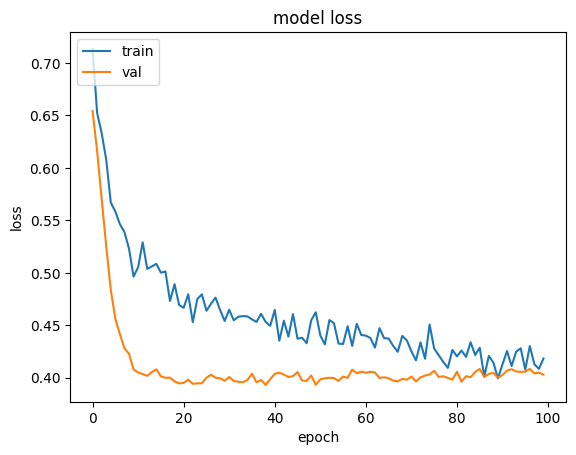

In [143]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

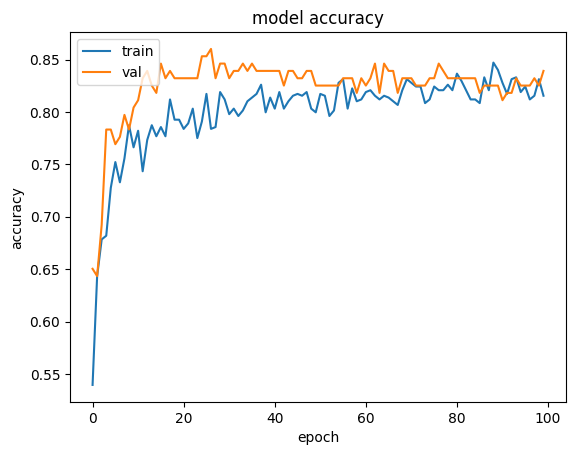

In [144]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [145]:
# Evaluate the model
loss, accuracy = model3.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8414 - loss: 0.4219 
Test Accuracy: 0.84


### Итоговый Classification Report и Confusion Matrix

In [146]:
y_pred = (model3.predict(X_test) > 0.5).astype("int32")

# Вывод confusion_matrix и classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       105
           1       0.87      0.72      0.79        74

    accuracy                           0.84       179
   macro avg       0.85      0.82      0.83       179
weighted avg       0.84      0.84      0.83       179

Confusion Matrix:
[[97  8]
 [21 53]]


* 97 погибших предсказаны как погибшие
* 8 погибших предсказаны как выжившие
* 21 выживший предсказан как погибший
* 53 выживших предсказаны как выжившие



* Модель предсказала, что погибнет 97 человек, а по факту погибло 105 человек
* Модель предсказала, что выживет 53 человека, а по факту выжило 74 человека



# Сохранение датасета, на котором обучалась модель

In [ ]:
# dff_Xy['Survived'] = y.cop_Xy = X.copy(deep=True)
# dy(deep=True)

In [ ]:
# df_Xy

In [ ]:
# df_Xy.to_csv(f'{BASE_URL}titanic_for_train.csv', sep=';')

# Итог

В ходе данной работы я освоил предобработку данных перед обучением модели. Я также проанализировал данные, построил графики и диаграммы, а также выделил новые признаки. В заключении работы я построил три нейронные сети, обучил их и оценил их эффективность с помощью кросс-валидации, отчета о классификации (Classification Report) и матрицы ошибок (Confusion Matrix).